In [1]:
import sys
sys.path.append('/data/zhicai/code/Diff-Mix/')
import seaborn as sns
import matplotlib.pyplot as plt
from utils import parse_result

def get_ds(dataset, shot):
    target_dir = f'/data/zhicai/code/Diff-Mix/outputs/result/main_result_{shot}'
    ds = parse_result(target_dir, extra_column=['syn_p'])
    ds=ds[ds['dataset']==dataset]
    # ds=ds[(ds['soft power']==0.8)| (ds['strategy'].isin(['realaug','aug','realgen','gen','baseline']))]

    ds.columns = [''.join(col).strip() for col in ds.columns.values]
    ds_baseline = ds[ds['strategy']=='baseline']
    ds_realgen = ds[ds['strategy']=='realgen']
    ds_gen = ds[ds['strategy']=='gen']
    try:
        ds.drop(ds_baseline.index,inplace=True)
        ds.drop( ds_realgen.index,inplace=True)
        ds.drop(ds_gen.index,inplace=True)
    except KeyError:
        print('Removed') 
    print('dataset:', dataset, shot)
    print('baseline:\n', ds_baseline)
    print('real_gen:\n', ds_realgen)
    print('gen:\n', ds_gen)
    print('---'*10)
    return ds, ds_baseline, ds_realgen, ds_gen

/data/zhicai/miniconda3/envs/comfyui/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def is_huiweng(x):
  if len(x) <= 1:
    return True
  else:
    x_reversed = []
    x_list = list(x) 
    for _ in range(len(x_list)):
      x_reversed.append(x_list.pop())
    print(x_reversed)
    print(x)
    return x_reversed == list(x)
      

In [3]:
import numpy as np
dataset='cub'
shot='All'
ds, ds_baseline, ds_realgen, ds_gen = get_ds(dataset,shot)

ds

dataset: cub All
baseline:
    dataset resolution    lr strength  strategy  soft power syn_p  accmean  \
27     cub        224  0.05        0  baseline         0.5   0.1    81.68   
28     cub        224  0.05        0  baseline         0.8   0.1    81.76   

    accvar  
27  0.0018  
28     NaN  
real_gen:
    dataset resolution    lr strength strategy  soft power syn_p  accmean  \
30     cub        224  0.05           realgen         0.5   0.1     80.4   
31     cub        224  0.05           realgen         0.8   0.1     80.4   

    accvar  
30  0.0031  
31  0.0031  
gen:
    dataset resolution    lr strength strategy  soft power syn_p  accmean  \
29     cub        224  0.05               gen         0.8   0.1    82.23   

    accvar  
29  0.0242  
------------------------------


,dataset,resolution,lr,strength,strategy,soft power,syn_p,accmean,accvar
32,cub,224,0.05,0.1,aug,0.5,0.1,81.566667,0.003333
33,cub,224,0.05,0.1,aug,0.8,0.1,81.566667,0.003333
40,cub,224,0.05,0.3,aug,0.5,0.1,81.700000,0.118300
41,cub,224,0.05,0.3,aug,0.8,0.1,81.700000,0.118300
48,cub,224,0.05,0.5,aug,0.5,0.1,81.583333,0.049433
49,cub,224,0.05,0.5,aug,0.8,0.1,81.583333,0.049433
56,cub,224,0.05,0.7,aug,0.5,0.1,81.485000,0.048050
57,cub,224,0.05,0.7,aug,0.8,0.1,81.603333,0.066033
64,cub,224,0.05,0.9,aug,0.5,0.1,81.860000,0.020000
65,cub,224,0.05,0.9,aug,0.8,0.1,81.970000,0.046300


dataset: cub 1shot
baseline:
    dataset resolution    lr strength  strategy  soft power syn_p  accmean  \
27     cub        224  0.05        0  baseline         0.5   0.5   16.075   

     accvar  
27  0.41405  
real_gen:
    dataset resolution    lr strength strategy  soft power syn_p  accmean  \
29     cub        224  0.05           realgen         0.5   0.5   25.545   

     accvar  
29  0.26645  
gen:
    dataset resolution    lr strength strategy  soft power syn_p  accmean  \
28     cub        224  0.05               gen         0.5   0.5     26.4   

    accvar  
28    0.08  
------------------------------


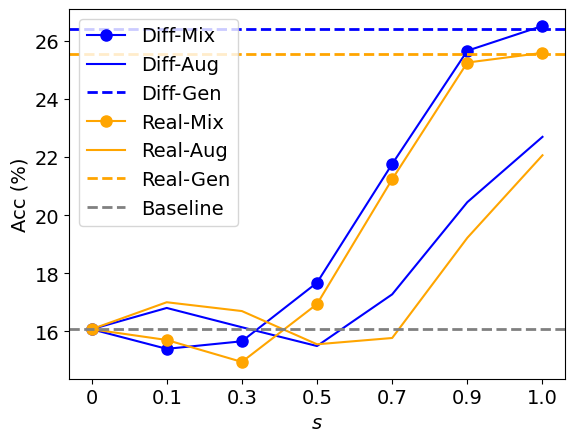

: 

In [40]:
import matplotlib.pyplot as plt
import numpy as np
dataset='cub'
shot='1shot'
ds, ds_baseline, ds_realgen, ds_gen = get_ds(dataset,shot)
# ds = ds[ds['soft power']==0.8]
font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
    }

ds_mean = ds.pivot(index=['strength'], columns='strategy', values='accmean')
ds_var = ds.pivot(index=['strength'], columns='strategy', values='accvar')
# Your data manipulation steps here...

baseline_value = ds_baseline['accmean'].mean()
x_values = ['0'] + ds_mean.index.astype(str).tolist()
y_baseline = np.full(len(x_values), baseline_value)

# plt.plot(x_values, y_baseline, color='gray', linestyle='--', linewidth=2, label='Baseline')

for strategy, label_name, marker, color in zip(['mixup', 'aug'],
                                                ['Diff-Mix', 'Diff-Aug'],
                                                ['o', ' '],
                                                ['blue', 'blue']):
    # Your plotting code remains the same...
    mean_values = ds_mean[strategy]
    y_values = np.concatenate(([baseline_value], mean_values.values))
    plt.plot(x_values, y_values, label=label_name, marker=marker, ms=8,color=color)

plt.axhline(y=ds_gen['accmean'].mean(), color='blue', linestyle='--',linewidth=2, label='Diff-Gen')

for strategy, label_name, marker, color in zip(['realmixup', 'realaug'],
                                                ['Real-Mix', 'Real-Aug'],
                                                ['o', ' '],
                                                ['orange', 'orange']):
    # Your plotting code remains the same...
    mean_values = ds_mean[strategy]
    y_values = np.concatenate(([baseline_value], mean_values.values))
    plt.plot(x_values, y_values, label=label_name, marker=marker,ms=8, color=color)
     
plt.axhline(y=ds_realgen['accmean'].mean(), color='orange', linestyle='--', linewidth=2,label='Real-Gen')
plt.axhline(y=ds_baseline['accmean'].mean(), color='gray', linestyle='--', linewidth=2,label='Baseline')


plt.xlabel('$s$', fontsize=14)
plt.ylabel('Acc (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(loc='upper left')
# plt.show()
plt.legend(fontsize=14,loc='upper left')
plt.savefig(f'../figures/results_{dataset}_{shot}.pdf',bbox_inches='tight')